# INFO 1998 Final Project: Predicting Olympic Swimming Medalists
#### Zack Hurwitz and Atreya Iyer

Our project was to predict which athletes win a medal in the Olympics for swimming. We used height, weight, age, country, sex, and event as input variables. The swimming data was a subset of the past 100 years of olympics dataset from Kaggle.

In [1]:
#imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Formatting Data
Our data contains information about the last 100 years of the Olympics, such as Name, Sex, Age, Height in centimeters, Weight in kilograms, Country, which Olympic Games it was in, Year, Summer and Winter, City, Sport, Event, and which medal the athlete received. 

In [2]:
oly = pd.read_csv("athlete_events.csv")

## Choosing and cleaning data

We decided to focus specifically on swimming as a sport because we thought that the age, height, and weight would be the most sigificant factors for certain events because the sport is fitness based. We replaced the NaN's in the medal column with "no medal".

In [3]:
oly["Medal"] = oly["Medal"].fillna("No Medal")
swimmers = oly[oly["Sport"] == "Swimming"]
oly.head(100)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal


Now dropping the unnecessary categorical data, and entries that were blank so that the data only contains athletes with full information:

In [4]:
oly_data = swimmers.drop(["ID", "Name", "Year", "NOC", "Games", "Season", "City"], axis=1).dropna()
oly_data.head()

,Sex,Age,Height,Weight,Team,Sport,Event,Medal
100,M,21.0,194.0,78.0,Netherlands,Swimming,Swimming Men's 100 metres Butterfly,No Medal
101,M,21.0,194.0,78.0,Netherlands,Swimming,Swimming Men's 200 metres Butterfly,No Medal
102,M,21.0,194.0,78.0,Netherlands,Swimming,Swimming Men's 4 x 100 metres Medley Relay,No Medal
103,M,25.0,194.0,78.0,Netherlands,Swimming,Swimming Men's 100 metres Butterfly,No Medal
104,M,25.0,194.0,78.0,Netherlands,Swimming,Swimming Men's 200 metres Butterfly,No Medal


We tried two different methods for encoding categorical data: replacing, and changing values to the index of their category. One was to replace using a dictionary, which is useful if there are a few known values to swap to. We decided to separate the medal columns into medaled or not rather than making a column with the medal such that classifiers would not have to choose which of the three medals, and rather, whether someone received a medal at all. A classifier would simply predict if each athlete earns any medal rather than predicting which specific medal is received and considering it wrong as a result. 

In [5]:
cleanup_nums = {"Medal": {"No Medal": 0, "Gold": 1, "Silver": 1, "Bronze": 1}}
oly_data.replace(cleanup_nums, inplace = True)

The second method was to make a list of unique values for the country, and change the value to the index of the country in the oly dataset. The reason we enumerated these variables was so that the models could use the information to help classify whether someone would become a medal winner. 

In [6]:
vals = list(np.unique(oly_data['Team']))
teams=[]
for value in oly_data['Team']:
    t=vals.index(value)
    teams.append(t)
oly_data['Team']=teams

We adapted the same method for the sport that the athlete did. 

In [7]:
vals = list(np.unique(oly_data['Sport']))
sports = []
for value in oly_data['Sport']:
    s = vals.index(value)
    sports.append(s)
oly_data['Sport'] = sports

We adapted the same method for the athlete's sex.

In [8]:
vals = ['M', 'F']
sex = []
for value in oly_data['Sex']:
    s = vals.index(value)
    sex.append(s)
oly_data['Sex'] = sex

We adapted the same method for the event that the athlete did, as different events likely require different attributes.

In [9]:
vals = list(np.unique(oly_data['Event']))
events = []
for value in oly_data['Event']:
    e = vals.index(value)
    events.append(e)
oly_data['Event'] = events

In [10]:
oly_data.head()

,Sex,Age,Height,Weight,Team,Sport,Event,Medal
100,0,21.0,194.0,78.0,122,0,5,0
101,0,21.0,194.0,78.0,122,0,10,0
102,0,21.0,194.0,78.0,122,0,15,0
103,0,25.0,194.0,78.0,122,0,5,0
104,0,25.0,194.0,78.0,122,0,10,0


Separating the target variable

In [11]:
medals = oly_data["Medal"]

# Predicting
We used several different models, and gridsearched them to find the best hyperparameters to make the most accurate model. The grid search consisted of what we determined to be the most important hyperparameters, and we chose the values based on previous problems and what would make the most sense for the data. Due to the time-intensity of the grid searches, many models couldn't be searched for this data set, as the grid search does a permutation of total parameters. 

### Base Model
This is the equivalent of guessing that every athlete will not win a medal, found by counting all medal winners and dividing by number of total athletes

In [12]:
from collections import Counter
c = Counter(medals)
print(c)
inputs = oly_data.drop(["Medal"], axis=1)
total = sum([c[count] for count in c])
total_medals = total - c[0]
print("Guessing no medal: %f" % (1 - total_medals / total))

Counter({0: 16290, 1: 2486})
Guessing no medal: 0.867597


## Prediction Method
Our predict method used the train test split with a test size of 2, and fits, predicts and scores the model using the split. We then use a cross validation score just to get a better sense of how it would do on more random data and smaller prediction size.

In [13]:
def predict(model, targets, inputs):
    x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)
    
    model.fit(x_train, y_train)
    model.predict(x_test)
    print("Score:", model.score(x_test, y_test))
    
    print("Cross-validation of values")
    print(cross_val_score(model, inputs, targets, cv=4, scoring="accuracy"))

## Decision Tree
We chose max depth, leaf nodes, and min samples split to change how many steps the tree takes to minimize overfitting, and the nodes and sample to change the rate at which the model adapts.

In [14]:
dtc = DecisionTreeClassifier()
GRID = GridSearchCV(dtc,
                    param_grid={'max_depth': [5, 10, 20],
                                'max_leaf_nodes': [10, 20, 50],
                                'min_samples_split': [2, 5, 10, 20, 50]},
                    scoring='accuracy',
                    cv=2, n_jobs=-1)
GRID.fit(inputs, medals)
print('The parameters of the best model are: ')
print(GRID.best_params_)

The parameters of the best model are: 
{'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 2}


In [15]:
dtc = DecisionTreeClassifier(max_depth=10, max_features=None, max_leaf_nodes=20,
                             min_samples_split=2)
predict(dtc, medals, inputs)

Score: 0.898296059638
Cross-validation of values
[ 0.90138445  0.8971246   0.89260601  0.89516301]


In [16]:
rfc=RandomForestClassifier(n_estimators = 500)
predict(rfc, medals, inputs)

Score: 0.902555910543
Cross-validation of values
[ 0.90074547  0.89499468  0.89196676  0.89686768]


In [17]:
# knn = KNeighborsClassifier()
# GRID = GridSearchCV(knn,
#                     param_grid={'n_neighbors': [5, 10, 20],
#                                 'p': [1, 2, 3],
#                                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                                 'leaf_size': [10, 100]},
#                     scoring='accuracy',
#                     cv=2, n_jobs=-1)
# GRID.fit(inputs, medals)
# print('The parameters of the best model are: ')
# print(GRID.best_params_)

In [18]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=20, p=3)
predict(knn, medals, inputs)

Score: 0.892438764643
Cross-validation of values
[ 0.88881789  0.88178914  0.88450884  0.88280418]


In [19]:
# svc = SVC()
# GRID = GridSearchCV(svc,
#                     param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#                                 'degree': [2, 3, 4, 5],
#                                 'C': [1.0, 0.5, 0.25, 1.25, 2]},
#                     scoring='accuracy',
#                     cv=2, n_jobs=-1)
# GRID.fit(inputs, medals)
# print('The parameters of the best model are: ')
# print(GRID.best_params_)

In [20]:
# mlp = MLPClassifier()
# GRID = GridSearchCV(mlp,
#                     param_grid={"activation" : ['identity', 'logistic', 'tanh', 'relu'],
#                                 'solver': ['lbfgs', 'sgd', 'adam'],
#                                 'batch_size': [10, 200, 400, 100, 50]},
#                     scoring='accuracy',
#                     cv=2, n_jobs=-1)
# GRID.fit(inputs, medals)
# print('The parameters of the best model are: ')
# print(GRID.best_params_)

In [21]:
mlp = MLPClassifier(activation = 'identity', batch_size = 200, solver = 'sgd')
predict(mlp, medals, inputs)

Score: 0.874600638978
Cross-validation of values
[ 0.86709265  0.86730564  0.86788834  0.86767526]


In [22]:
abc = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10), n_estimators=100)
predict(abc, medals, inputs)

Score: 0.896698615548
Cross-validation of values
[ 0.8913738   0.89009585  0.88323034  0.88770509]


# Visualizations
We first decided to make a 3D scatter plots with age, height, and weight for every athlete. The blue dots represent losing athletes, and the brown dots are athletes who won a medal. There is no clear distinguishable pattern.

/Applications/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 1 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Applications/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


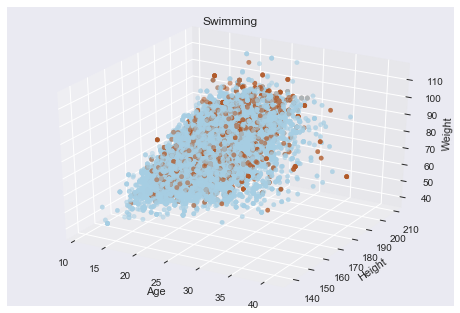

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(oly_data['Age'], oly_data['Height'], oly_data['Weight'], c=medals, cmap=plt.cm.Paired)

#colors = plt.cm.get_cmap('Paired')
#for medal in np.unique(medals):
#    ix = np.where(inputs[0] == medal)
#    ax.scatter(oly_data['Age'].loc[ix],oly_data['Height'].loc[ix],oly_data['Weight'], c = colors(medals), label = oly_data.target_names[medals])


ax.set_title("Swimming")
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.legend([1,0],['blue','brown'])

plt.show()


We then decided to try calculating the athletes' BMIs and comparing this to their ages. Again, medalists are in brown, non-medalists in blue. Clearly, we don't see much of a pattern.

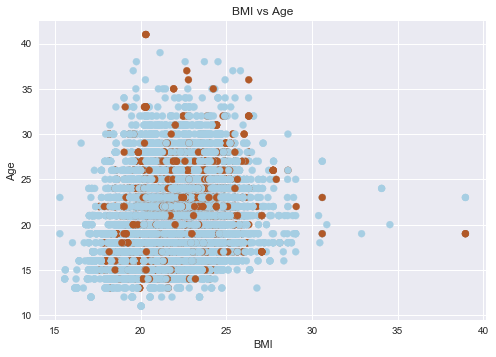

In [24]:
h=oly_data['Height'].values
w=oly_data['Weight'].values
oly_data['BMI'] = w/((h/100)**2)

plt.scatter(oly_data['BMI'], oly_data['Age'], c=medals, cmap=plt.cm.Paired)
plt.title('BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

# More Visualizations
Just for fun, we decided to look at a few more interesting trends we found.

In [25]:
basketball = oly[oly["Sport"] == "Basketball"].dropna()
mbasketball = basketball[basketball["Sex"] == "M"]
wbasketball = basketball[basketball["Sex"] == "F"]
mbasketball1936 = mbasketball[mbasketball["Year"] == 1936]
mbasketball1968 = mbasketball[mbasketball["Year"] == 1968]
mbasketball2016 = mbasketball[mbasketball["Year"] == 2016]
gymnastics = oly[oly["Sport"] == "Gymnastics"].dropna()
wgymnastics = gymnastics[gymnastics["Sex"] == "F"].dropna()
wgymnastics2016 = wgymnastics[wgymnastics["Year"] == 2016]
wgymnastics1936 = wgymnastics[wgymnastics["Year"] == 1936]

### Men's Basketball Height vs Women's Gymnastics Height
We started by looking for what we thought would be an obvious trend, so we compared the heights of male basketball players and female gymnists.

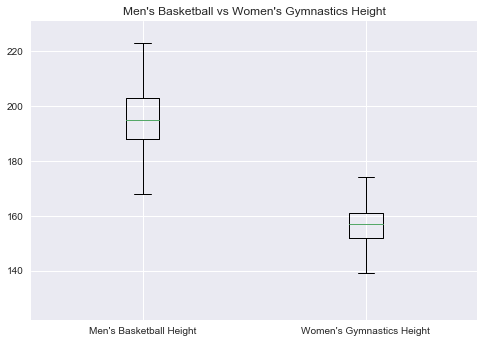

In [26]:
bp = plt.boxplot([mbasketball['Height'], wgymnastics['Height']])
plt.title("Men's Basketball vs Women's Gymnastics Height")
plt.xticks([1,2],["Men's Basketball Height","Women's Gymnastics Height"])
plt.show()

#### The difference is even more noticeable if we look at the athletes just in 2016.

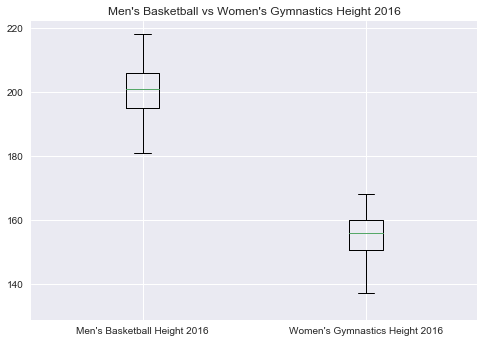

In [27]:
bp = plt.boxplot([mbasketball2016['Height'], wgymnastics2016['Height']])
plt.title("Men's Basketball vs Women's Gymnastics Height 2016")
plt.xticks([1,2],["Men's Basketball Height 2016","Women's Gymnastics Height 2016"])
plt.show()

#### You can also notice a clear trend in the height of men's basketball players over time.

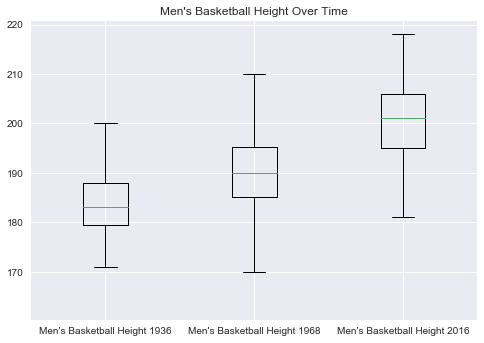

In [28]:
bp = plt.boxplot([mbasketball1936['Height'], mbasketball1968['Height'], mbasketball2016['Height']])
plt.title("Men's Basketball Height Over Time")
plt.xticks([1,2,3],["Men's Basketball Height 1936","Men's Basketball Height 1968", "Men's Basketball Height 2016"])
plt.show()

#### Also, female gymnastics have gotten younger over time.

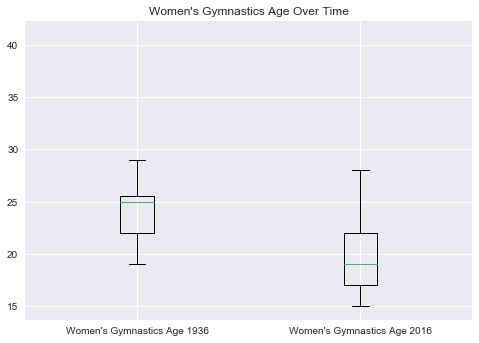

In [29]:
bp = plt.boxplot([wgymnastics1936['Age'], wgymnastics2016['Age']])
plt.title("Women's Gymnastics Age Over Time")
plt.xticks([1,2],["Women's Gymnastics Age 1936", "Women's Gymnastics Age 2016"])
plt.show()